In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [29]:
label= [
    'USD_CHF.csv',

    'CHF_EUR.csv',
    'CHF_GBP.csv',
    'CHF_JPY.csv',
    'CHF_CAD.csv',
    'BondCH1m.csv',
    'BondCH2y.csv',
    'BondCH10y.csv',
    'SMI.csv',
    
    'USD_JPY.csv',
    'USD_EUR.csv',
    'USD_GBP.csv',
    'USD_CAD.csv',
    'BondUS1m.csv',
    'BondUS2y.csv',
    'BondUS10y.csv',
    'SP500.csv'
]
df = []
for name in label:
    if name == 'SP500.csv': continue 
    b = pd.read_csv(name)[['Date', 'Open']]
    
    print(pd.read_csv(name).columns)
   # print(name,len(b), b.isnull().sum().sum(), b.Date.iloc[-1], b.Date.iloc[0])
    b.Date = pd.to_datetime(b.Date)
    b.Open = b.Open.astype(str)
    b.Open = b.Open.apply(lambda x: x.replace(',','') )

    b.Open = b.Open.astype(float)
    b = b.rename(columns={'Open':'Open_'+name[:-4]})
    df.append(b)
    print(name,len(b), b.isnull().sum().sum(), b.Date.iloc[-1], b.Date.iloc[0])
print("--")


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
USD_CHF.csv 5000 0 2000-01-03 00:00:00 2019-03-05 00:00:00
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
CHF_EUR.csv 5000 0 2000-01-03 00:00:00 2019-03-06 00:00:00
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
CHF_GBP.csv 5000 0 2000-01-03 00:00:00 2019-03-06 00:00:00
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
CHF_JPY.csv 5000 0 2000-01-03 00:00:00 2019-03-06 00:00:00
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
CHF_CAD.csv 5000 0 2000-01-03 00:00:00 2019-03-06 00:00:00
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')
BondCH1m.csv 5000 0 2000-01-04 00:00:00 2017-12-13 00:00:00
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')
BondCH2y.csv 5000 0 2000-01-04 00:00:00 2020-03-26 00:00:00
Index(['Date'

In [30]:
b = pd.read_csv('SP500.csv')[['Date', 'Price']]

print(pd.read_csv(name).columns)
# print(name,len(b), b.isnull().sum().sum(), b.Date.iloc[-1], b.Date.iloc[0])
b.Date = pd.to_datetime(b.Date)
b.Price = b.Price.astype(str)
b.Price = b.Price.apply(lambda x: x.replace(',','') )

b.Price = b.Price.astype(float)
b = b.rename(columns={'Price':'Prev_Close_'+name[:-4]})
b.iloc[:,1] = b.iloc[:,1].shift(-1)
print(len(b))
df.append(b.iloc[:-1])

print(name,len(df[-1]), df[-1].isnull().sum().sum(), df[-1].Date.iloc[-1], df[-1].Date.iloc[0])

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
5000
SP500.csv 4999 0 2000-01-04 00:00:00 2019-11-14 00:00:00


In [31]:
buff = df[0]
for d in df[1:]:
   buff = buff.merge(d, left_on='Date', right_on='Date')
buff

,Date,Open_USD_CHF,Open_CHF_EUR,Open_CHF_GBP,Open_CHF_JPY,Open_CHF_CAD,Open_BondCH1m,Open_BondCH2y,Open_BondCH10y,Open_SMI,Open_USD_JPY,Open_USD_EUR,Open_USD_GBP,Open_USD_CAD,Open_BondUS1m,Open_BondUS2y,Open_BondUS10y,Prev_Close_SP500
0,2017-06-21,0.9750,0.9213,0.8122,114.32,1.3609,-0.96,-0.888,-0.148,8993.41,111.45,0.8982,0.7918,1.3268,0.852,1.356,2.164,2437.03
1,2017-06-20,0.9755,0.9195,0.8046,114.29,1.3548,-0.92,-0.868,-0.142,9057.97,111.53,0.8970,0.7850,1.3217,0.842,1.368,2.195,2453.46
2,2017-06-19,0.9732,0.9169,0.8027,113.83,1.3574,-0.89,-0.887,-0.149,9014.34,110.83,0.8929,0.7817,1.3217,0.837,1.323,2.158,2433.15
3,2017-06-16,0.9755,0.9200,0.8037,113.76,1.3607,-0.92,-0.882,-0.163,8903.14,110.92,0.8972,0.7837,1.3269,0.865,1.364,2.167,2432.46
4,2017-06-15,0.9709,0.9178,0.8076,112.84,1.3641,-0.89,-0.901,-0.166,8854.52,109.56,0.8914,0.7842,1.3244,0.903,1.339,2.125,2437.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,2002-01-08,1.6480,0.6785,0.4209,79.49,0.9695,1.60,2.509,3.369,6353.20,131.04,1.1187,0.6940,1.5987,1.680,3.069,5.083,1164.90
3545,2002-01-07,1.6520,0.6760,0.4180,79.26,0.9657,1.65,2.531,3.401,6407.00,130.90,1.1168,0.6906,1.5956,1.700,3.053,5.049,1172.50
3546,2002-01-04,1.6506,0.6733,0.4210,79.79,0.9677,1.69,1.966,3.412,6408.30,131.72,1.1126,0.6953,1.5984,1.725,3.168,5.125,1165.30
3547,2001-12-28,1.6776,0.6745,0.4106,78.48,0.9520,1.68,2.059,3.474,6430.60,131.68,1.1319,0.6887,1.5981,1.720,3.169,5.113,1157.10


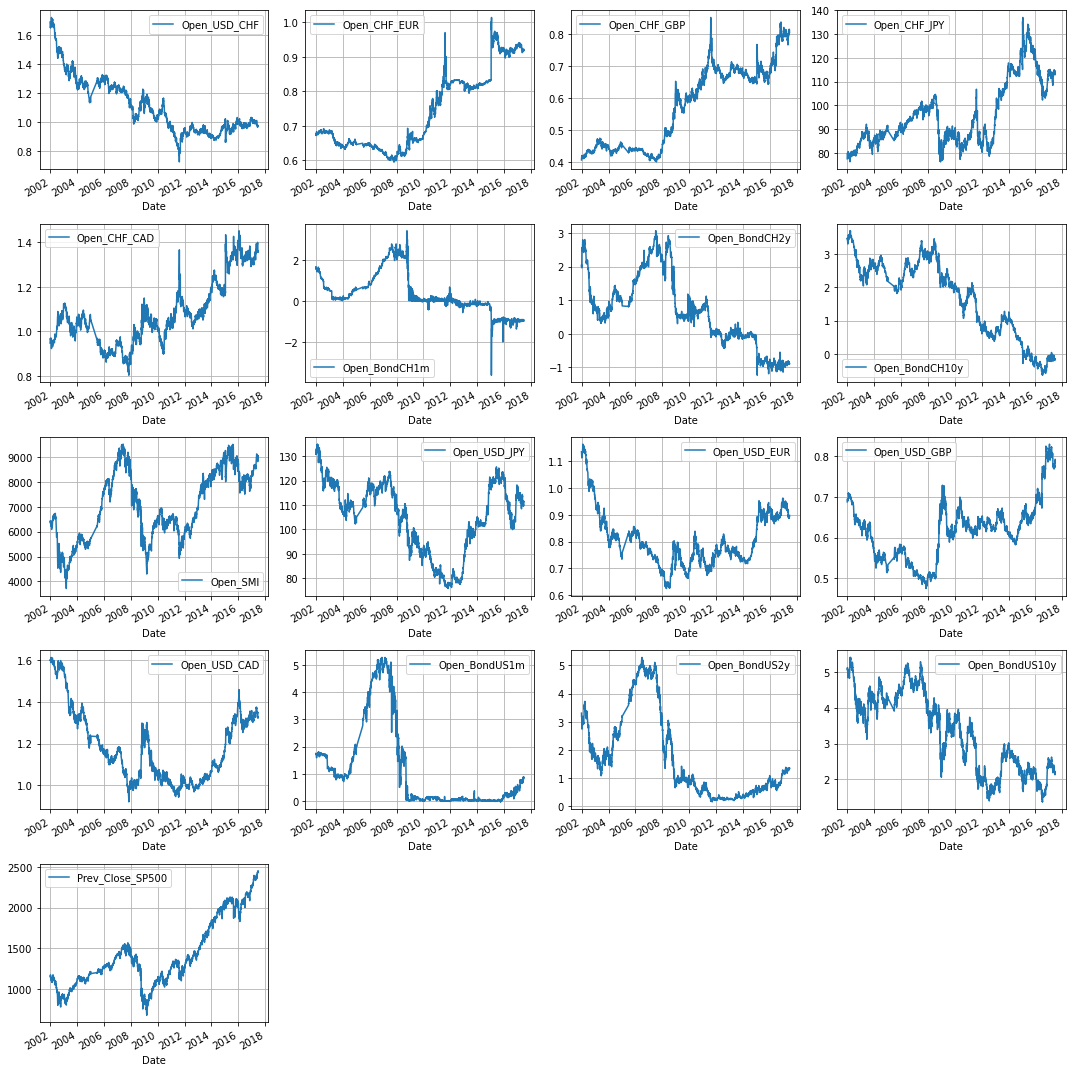

In [32]:
plt.figure(figsize=(15,15))
for i in range(len(df)):
    ax= plt.subplot(5, 4,i+1)
    buff.plot(x='Date', y=buff.columns[i+1], ax=ax)
    ax.grid()
plt.tight_layout()
plt.show()

<AxesSubplot:>

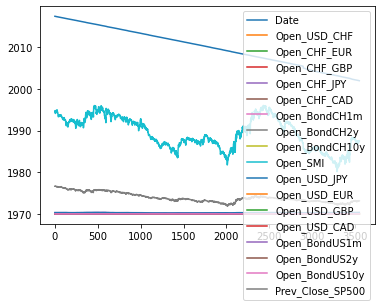

In [33]:
import matplotlib.pyplot as plt
buff.sort_values( by='Date', ascending=False).plot()


In [34]:
buff.isnull().sum()

Date                0
Open_USD_CHF        0
Open_CHF_EUR        0
Open_CHF_GBP        0
Open_CHF_JPY        0
Open_CHF_CAD        0
Open_BondCH1m       0
Open_BondCH2y       0
Open_BondCH10y      0
Open_SMI            0
Open_USD_JPY        0
Open_USD_EUR        0
Open_USD_GBP        0
Open_USD_CAD        0
Open_BondUS1m       0
Open_BondUS2y       0
Open_BondUS10y      0
Prev_Close_SP500    0
dtype: int64

In [35]:
buff.sort_values( by='Date', ascending=True).to_csv('dataset_daily.csv', index=False)

<AxesSubplot:>

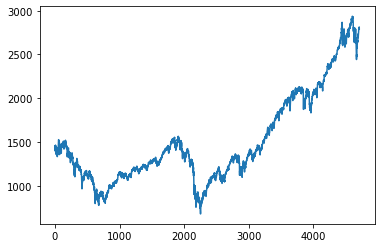

In [67]:

buff = buff.sort_values(by='Date', ascending=True)
buff = buff.reset_index(drop=True)
buff['Open_SP500'].plot()

In [36]:
pd.read_csv('dataset_daily.csv')

,Date,Open_USD_CHF,Open_CHF_EUR,Open_CHF_GBP,Open_CHF_JPY,Open_CHF_CAD,Open_BondCH1m,Open_BondCH2y,Open_BondCH10y,Open_SMI,Open_USD_JPY,Open_USD_EUR,Open_USD_GBP,Open_USD_CAD,Open_BondUS1m,Open_BondUS2y,Open_BondUS10y,Prev_Close_SP500
0,2001-12-27,1.6886,0.6723,0.4071,77.46,0.9477,1.68,2.011,3.460,6392.10,130.82,1.1356,0.6876,1.6010,1.751,3.307,5.072,1149.40
1,2001-12-28,1.6776,0.6745,0.4106,78.48,0.9520,1.68,2.059,3.474,6430.60,131.68,1.1319,0.6887,1.5981,1.720,3.169,5.113,1157.10
2,2002-01-04,1.6506,0.6733,0.4210,79.79,0.9677,1.69,1.966,3.412,6408.30,131.72,1.1126,0.6953,1.5984,1.725,3.168,5.125,1165.30
3,2002-01-07,1.6520,0.6760,0.4180,79.26,0.9657,1.65,2.531,3.401,6407.00,130.90,1.1168,0.6906,1.5956,1.700,3.053,5.049,1172.50
4,2002-01-08,1.6480,0.6785,0.4209,79.49,0.9695,1.60,2.509,3.369,6353.20,131.04,1.1187,0.6940,1.5987,1.680,3.069,5.083,1164.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,2017-06-15,0.9709,0.9178,0.8076,112.84,1.3641,-0.89,-0.901,-0.166,8854.52,109.56,0.8914,0.7842,1.3244,0.903,1.339,2.125,2437.92
3545,2017-06-16,0.9755,0.9200,0.8037,113.76,1.3607,-0.92,-0.882,-0.163,8903.14,110.92,0.8972,0.7837,1.3269,0.865,1.364,2.167,2432.46
3546,2017-06-19,0.9732,0.9169,0.8027,113.83,1.3574,-0.89,-0.887,-0.149,9014.34,110.83,0.8929,0.7817,1.3217,0.837,1.323,2.158,2433.15
3547,2017-06-20,0.9755,0.9195,0.8046,114.29,1.3548,-0.92,-0.868,-0.142,9057.97,111.53,0.8970,0.7850,1.3217,0.842,1.368,2.195,2453.46
